#### Visualising dataset distribution to obtain clear and immediate insight into the chosen data.

##### Importing required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Empathetic Dialogues dataset

In [11]:
fields = ['conv_id', 'context', 'prompt','utterance']
ed_train_df = pd.read_csv('data/empathetic_dialogues_train.csv', encoding='utf-8', low_memory=False, usecols=fields)
ed_train_df.head()

,conv_id,context,prompt,utterance
0,hit:0_conv:1,sentimental,I remember going to the fireworks with my best...,I remember going to see the fireworks with my ...
1,hit:0_conv:1,sentimental,I remember going to the fireworks with my best...,Was this a friend you were in love with_comma_...
2,hit:0_conv:1,sentimental,I remember going to the fireworks with my best...,This was a best friend. I miss her.
3,hit:0_conv:1,sentimental,I remember going to the fireworks with my best...,Where has she gone?
4,hit:0_conv:1,sentimental,I remember going to the fireworks with my best...,We no longer talk.


In [12]:
# Number of rows and columns
ed_train_df.shape

(76673, 4)

##### Fetching distinct topics

In [6]:
len (set(ed_train_df['context'].tolist()))

32

In [8]:
ed_topics = set(ed_train_df['context'].tolist())
ed_topics

{'afraid',
 'angry',
 'annoyed',
 'anticipating',
 'anxious',
 'apprehensive',
 'ashamed',
 'caring',
 'confident',
 'content',
 'devastated',
 'disappointed',
 'disgusted',
 'embarrassed',
 'excited',
 'faithful',
 'furious',
 'grateful',
 'guilty',
 'hopeful',
 'impressed',
 'jealous',
 'joyful',
 'lonely',
 'nostalgic',
 'prepared',
 'proud',
 'sad',
 'sentimental',
 'surprised',
 'terrified',
 'trusting'}

##### Distribution of responses per question

Text(0.5, 0, 'Number of responses')

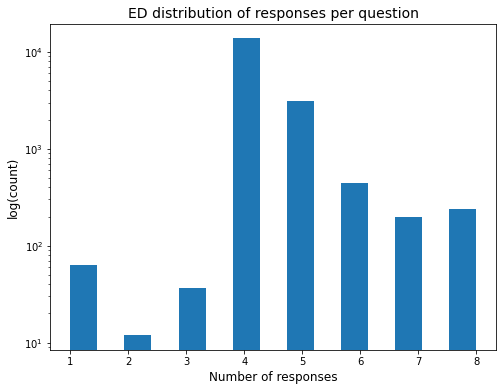

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ed_train_df.groupby('conv_id').agg('count')['prompt'].plot.hist(bins=15, logy=True)
ax.set_title('ED distribution of responses per question', fontsize=14)
ax.set_ylabel('log(count)', fontsize=12)
ax.set_xlabel('Number of responses', fontsize=12)

##### Distribution of questions per topic

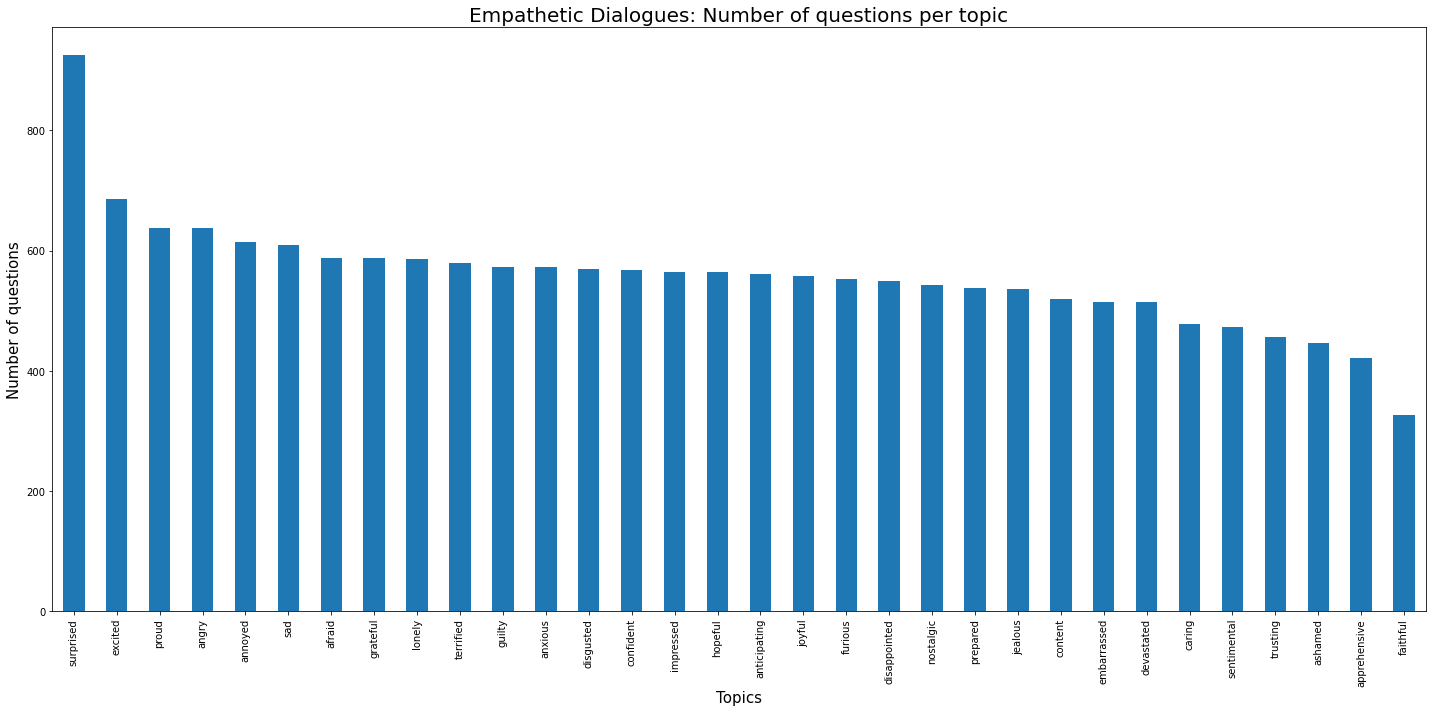

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ed_train_df.groupby(['context', 'conv_id']).agg('count').reset_index().groupby('context').agg('count')['conv_id'].sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Empathetic Dialogues: Number of questions per topic', fontsize=20)
ax.set_ylabel('Number of questions', fontsize=15)
ax.set_xlabel('Topics', fontsize=15)
plt.tight_layout()

##### Distribution of question and answer length

Text(0.5, 1.0, 'Distribution of answer length')

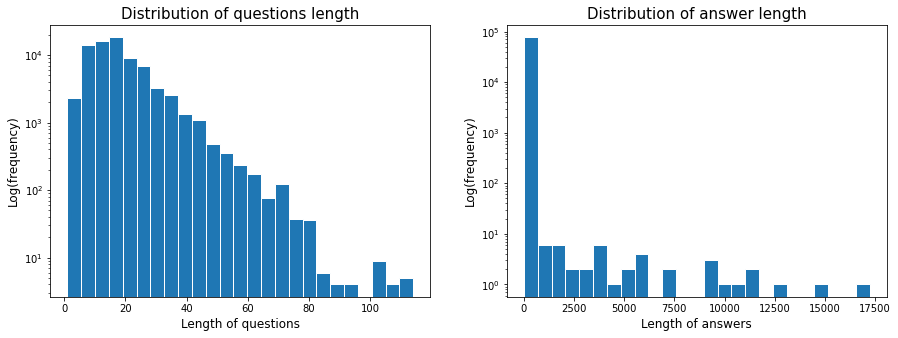

In [19]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

# Average number of words in questions
ed_train_df['questionLength'] = ed_train_df['prompt'].apply(lambda x: len(x.split(' ')))
ed_train_df['questionLength'].astype(int).plot.hist(bins=25, ax=axs[0], logy=True, edgecolor='white')
axs[0].set_xlabel('Length of questions', fontsize=12)
axs[0].set_ylabel('Log(frequency)', fontsize=12)
axs[0].set_title('Distribution of questions length', fontsize=15)


ed_train_df['responseLength']=ed_train_df['utterance'].apply(lambda x: len(str(x).split(' ') ))
ed_train_df['responseLength'].astype(int).plot.hist(bins=25, ax=axs[1], logy=True, edgecolor='white')
axs[1].set_xlabel('Length of answers', fontsize=12)
axs[1].set_ylabel('Log(frequency)', fontsize=12)
axs[1].set_title('Distribution of answer length', fontsize=15)

In [24]:
max = -1
for row in ed_train_df.iterrows():
    utt = row[1]['utterance']
    utt = str(utt)
    if len(utt) > max:
        max = len(utt)
        print(max)
        print(utt)

200
I remember going to see the fireworks with my best friend. It was the first time we ever spent time alone together. Although there was a lot of people_comma_ we felt like the only people in the world.
203
My aunt does the same thing! I think what she is doing is accidentally deleting texts_comma_ and she doesn't understand how to check her contacts list. What do you think is happening with your co-worker?
209
It has a miss. Sometimes when you are driving it sputters and jerks and barely has any power. Other times it drives just fine. I have replaced so many things on it and nothing makes a difference for very long.
222
I was only married for 4 weeks when I learned my husband was having an affair and ongoing after the wedding. I got him back by sleeping with a close family friend. I felt guilty and ashamed because it was out of character.
227
My wife was amazing. She booked the whole trip for us_comma_ and planned out some things for us to do while we were there. The person's house 

### Loading counsel chat dataset

In [26]:
counsel_chat_df = pd.read_csv('data/counsel_chat.csv', encoding='utf-8')
counsel_chat_df.head()

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train
1,1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train
2,2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train
3,3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train
4,4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train


In [28]:
# Obtaining number of rows and columns
counsel_chat_df.shape

(2129, 12)

##### Fetching distinct topics

In [29]:
len(set(counsel_chat_df['topic'].tolist()))

31

In [30]:
counsel_topics = set(counsel_chat_df["topic"].tolist())
counsel_topics

{'addiction',
 'anger-management',
 'anxiety',
 'behavioral-change',
 'children-adolescents',
 'counseling-fundamentals',
 'depression',
 'diagnosis',
 'domestic-violence',
 'eating-disorders',
 'family-conflict',
 'grief-and-loss',
 'human-sexuality',
 'intimacy',
 'legal-regulatory',
 'lgbtq',
 'marriage',
 'military-issues',
 'parenting',
 'professional-ethics',
 'relationship-dissolution',
 'relationships',
 'self-esteem',
 'self-harm',
 'sleep-improvement',
 'social-relationships',
 'spirituality',
 'stress',
 'substance-abuse',
 'trauma',
 'workplace-relationships'}

##### Distribution of responses per question

Text(0.5, 0, 'Number of responses')

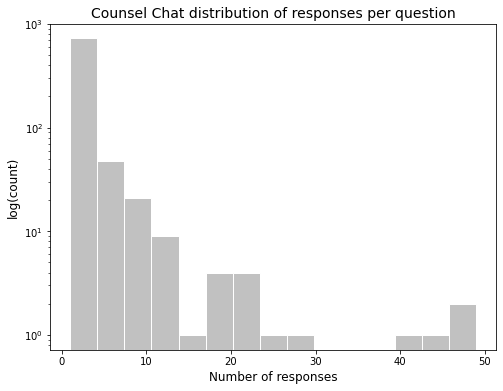

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
counsel_chat_df.groupby("questionID").agg("count")["questionText"].plot.hist(bins=15, logy=True, color=(0.6, 0.6, 0.6, 0.6), edgecolor='white' )
ax.set_title("Counsel Chat distribution of responses per question", fontsize=14)
ax.set_ylabel("log(count)", fontsize=12)
ax.set_xlabel("Number of responses", fontsize=12)

##### Distribution of questions per topic

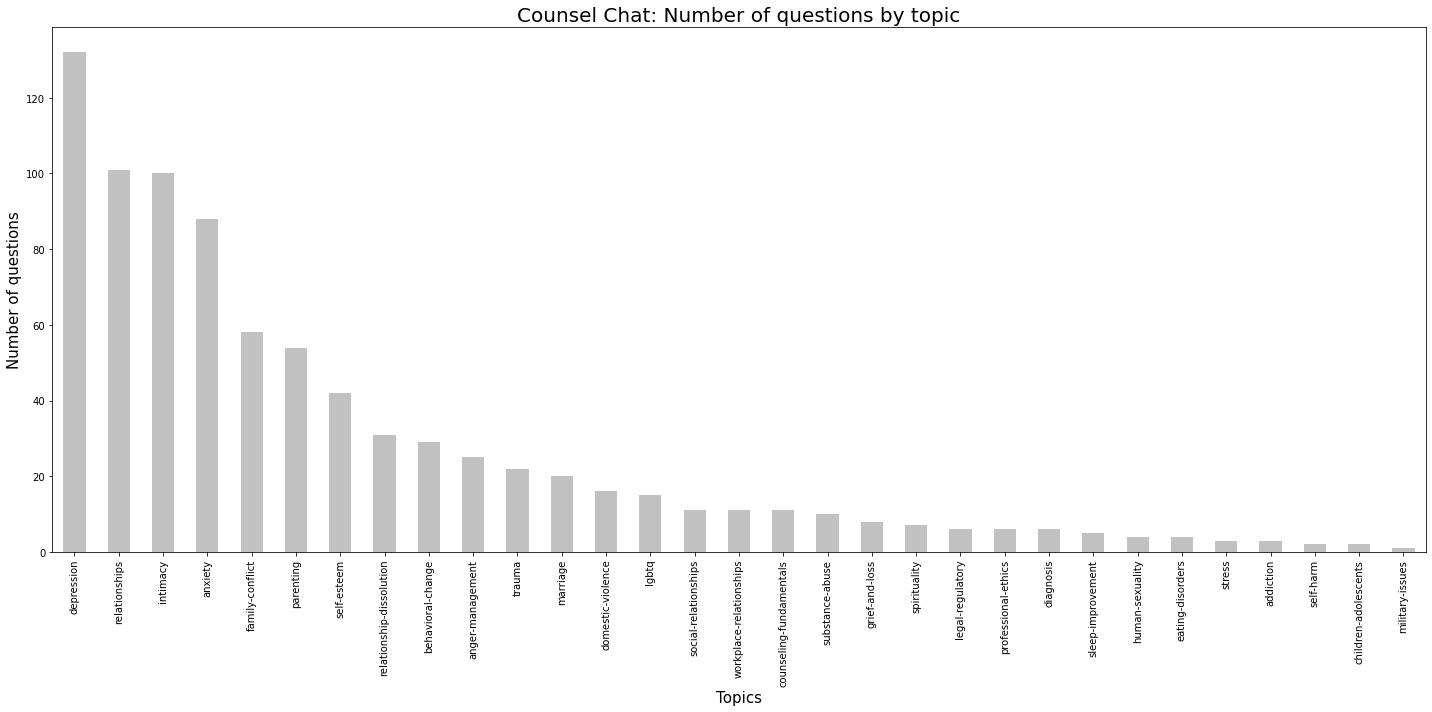

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
counsel_chat_df.groupby(['topic', 'questionID']).agg('count').reset_index().groupby('topic').agg('count')['questionID'].sort_values(ascending=False).plot.bar(ax=ax,color=(0.6, 0.6, 0.6, 0.6))
ax.set_title('Counsel Chat: Number of questions by topic', fontsize=20)
ax.set_ylabel('Number of questions', fontsize=15)
ax.set_xlabel('Topics', fontsize=15)
plt.tight_layout()

##### Distribution of question and answer length

Text(0.5, 1.0, 'Distribution of answer length')

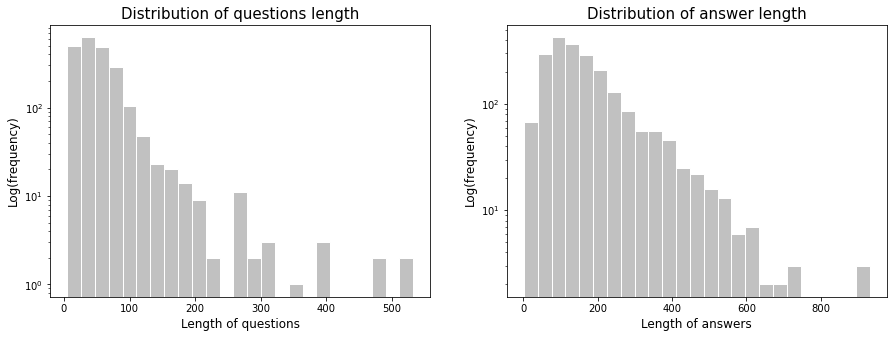

In [35]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

# Average number of words in questions
counsel_chat_df['questionLength'] = counsel_chat_df['questionText'].apply(lambda x: len(x.split(' ')))
counsel_chat_df['questionLength'].astype(int).plot.hist(bins=25, ax=axs[0], logy=True, color=(0.6, 0.6, 0.6, 0.6), edgecolor='white')
axs[0].set_xlabel('Length of questions', fontsize=12)
axs[0].set_ylabel('Log(frequency)', fontsize=12)
axs[0].set_title('Distribution of questions length', fontsize=15)

counsel_chat_df['responseLength']=counsel_chat_df['answerText'].apply(lambda x: len(x.split(' ')))
counsel_chat_df['responseLength'].astype(int).plot.hist(bins=25, ax=axs[1], logy=True, color=(0.6, 0.6, 0.6, 0.6), edgecolor='white')
axs[1].set_xlabel('Length of answers', fontsize=12)
axs[1].set_ylabel('Log(frequency)', fontsize=12)
axs[1].set_title('Distribution of answer length', fontsize=15)

### Loading Counsel Chat Dataset

In [4]:
fields = ['questionID', 'topic', 'questionTitle','answerText']
counsel_chat_df = pd.read_csv('data/counsel_chat.csv', encoding='utf-8', low_memory=False, usecols=fields)
counsel_chat_df.head()

,questionID,questionTitle,topic,answerText
0,0,Can I change my feeling of being worthless to ...,depression,"If everyone thinks you're worthless, then mayb..."
1,0,Can I change my feeling of being worthless to ...,depression,"Hello, and thank you for your question and see..."
2,0,Can I change my feeling of being worthless to ...,depression,First thing I'd suggest is getting the sleep y...
3,0,Can I change my feeling of being worthless to ...,depression,Therapy is essential for those that are feelin...
4,0,Can I change my feeling of being worthless to ...,depression,I first want to let you know that you are not ...


In [8]:
counsel_chat_df.shape

(2129, 4)

In [5]:
# Viewing the number of different topics
len(set(counsel_chat_df['topic'].tolist()))

31

In [7]:
counsel_topics = set(counsel_chat_df['topic'].tolist())
counsel_topics

{'addiction',
 'anger-management',
 'anxiety',
 'behavioral-change',
 'children-adolescents',
 'counseling-fundamentals',
 'depression',
 'diagnosis',
 'domestic-violence',
 'eating-disorders',
 'family-conflict',
 'grief-and-loss',
 'human-sexuality',
 'intimacy',
 'legal-regulatory',
 'lgbtq',
 'marriage',
 'military-issues',
 'parenting',
 'professional-ethics',
 'relationship-dissolution',
 'relationships',
 'self-esteem',
 'self-harm',
 'sleep-improvement',
 'social-relationships',
 'spirituality',
 'stress',
 'substance-abuse',
 'trauma',
 'workplace-relationships'}

Text(0.5, 0, 'Number of responses')

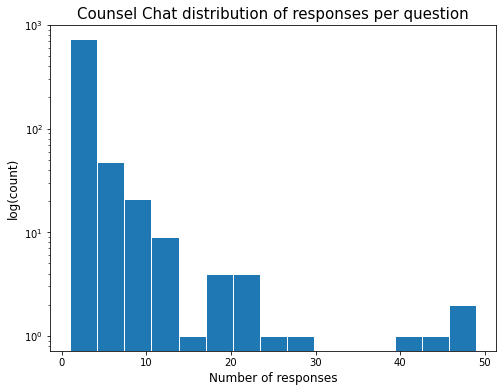

In [12]:
# Distribution of responses per question
fig, ax = plt.subplots(figsize=(8,6))
counsel_chat_df.groupby("questionID").agg("count")["questionTitle"].plot.hist(bins=15, logy=True, edgecolor='white' )
ax.set_title("Counsel Chat distribution of responses per question", fontsize=15)
ax.set_ylabel("log(count)", fontsize=12)
ax.set_xlabel("Number of responses", fontsize=12)

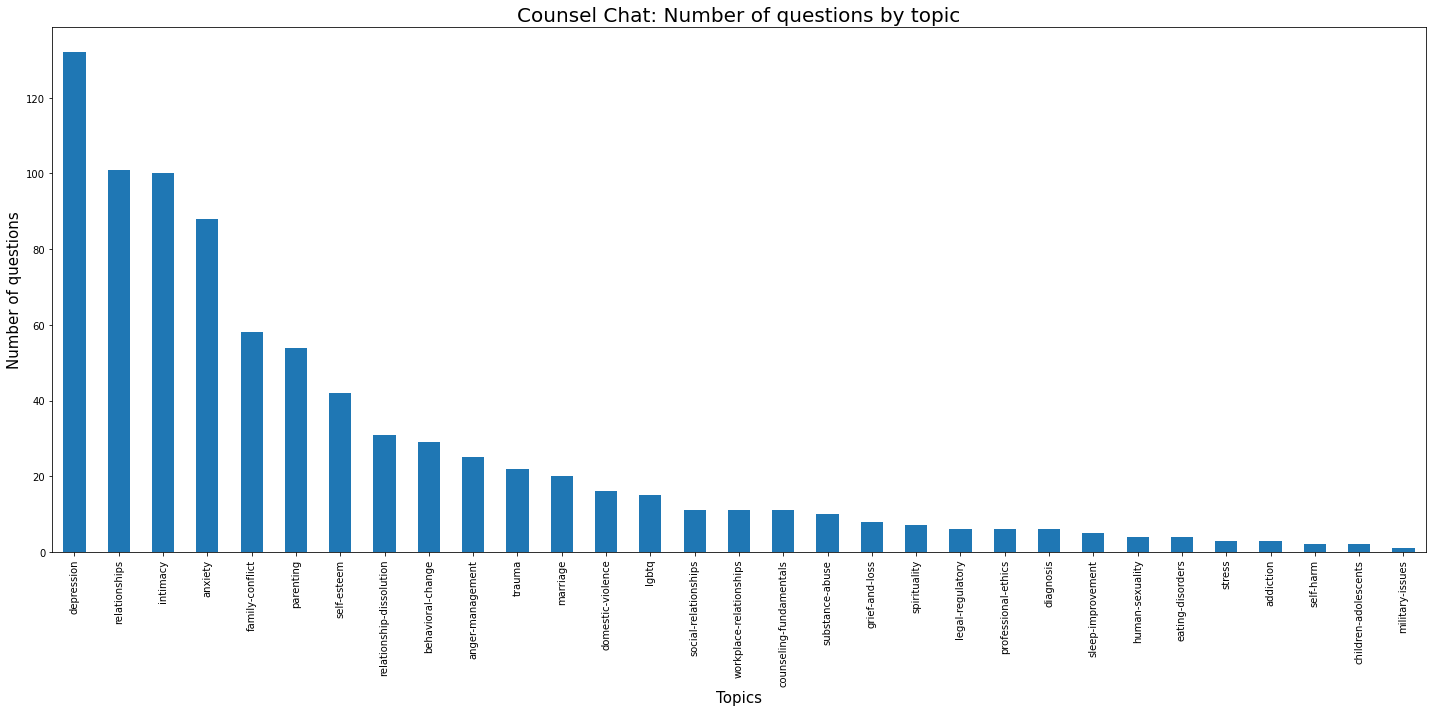

In [14]:
# Distribution of questions per topic
fig, ax = plt.subplots(figsize=(20,10))
counsel_chat_df.groupby(['topic', 'questionID']).agg('count').reset_index().groupby('topic').agg('count')['questionID'].sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Counsel Chat: Number of questions by topic', fontsize=20)
ax.set_ylabel('Number of questions', fontsize=15)
ax.set_xlabel('Topics', fontsize=15)
plt.tight_layout()

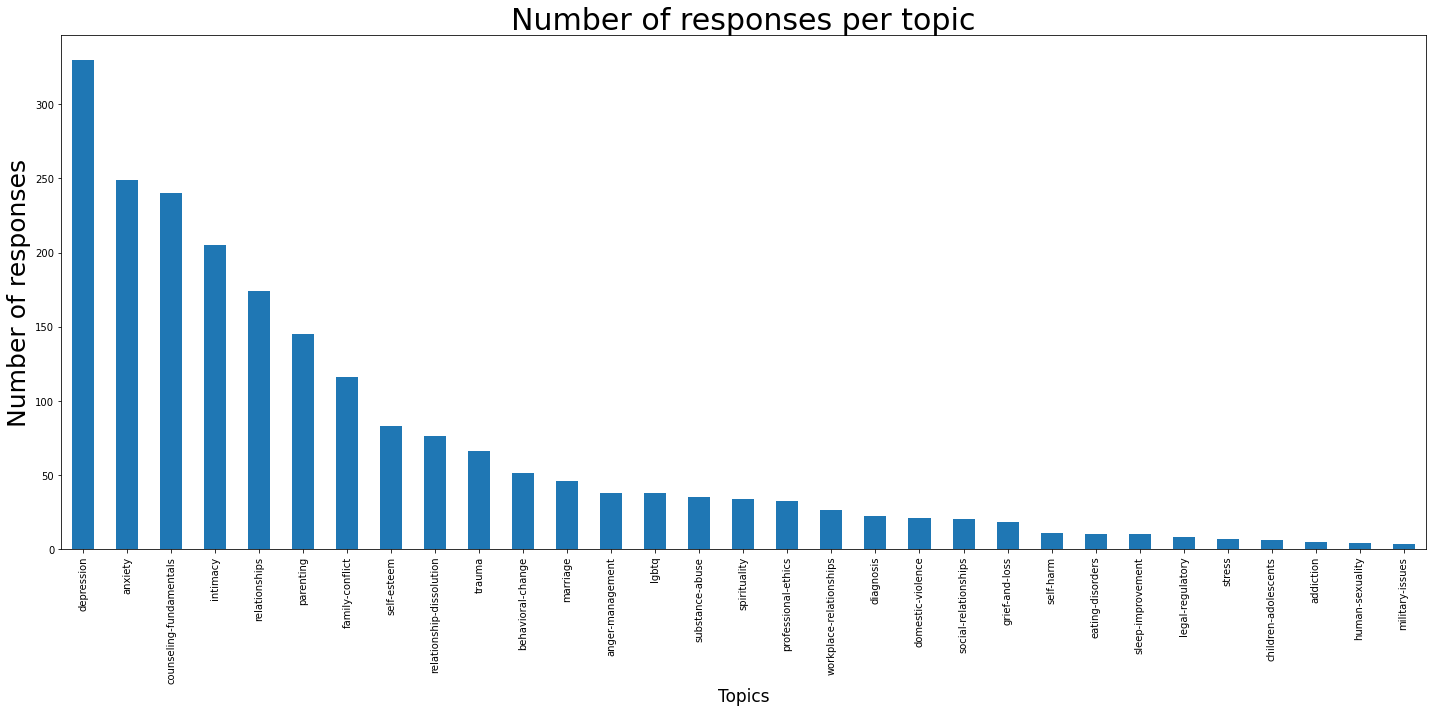

In [15]:
# Distribution of responses per topic
fig, ax = plt.subplots(figsize=(20,10))
counsel_chat_df.groupby('topic').agg('count')['questionID'].sort_values(ascending=False).plot.bar(ax=ax)
ax.set_title('Number of responses per topic', fontsize=30)
ax.set_ylabel('Number of responses', fontsize=25)
ax.set_xlabel('Topics', fontsize=17)
plt.tight_layout()

Text(0.5, 1.0, 'Counsel Chat: Distribution of answer length')

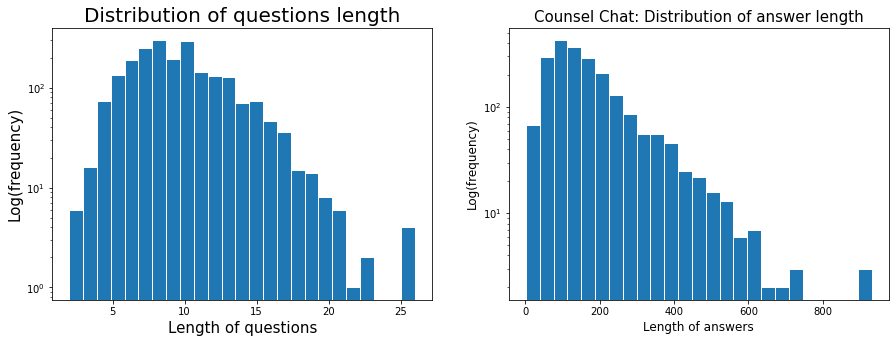

In [16]:
# Distribution of question and answer length
fig, axs = plt.subplots(1,2, figsize=(15,5))

# Average number of words in questions
counsel_chat_df['questionLength'] = counsel_chat_df['questionTitle'].apply(lambda x: len(x.split(' ')))
counsel_chat_df['questionLength'].astype(int).plot.hist(bins=25, ax=axs[0], logy=True, edgecolor='white')
axs[0].set_xlabel('Length of questions', fontsize=15)
axs[0].set_ylabel('Log(frequency)', fontsize=15)
axs[0].set_title('Distribution of questions length', fontsize=20)

counsel_chat_df['responseLength']=counsel_chat_df['answerText'].apply(lambda x: len(x.split(' ')))
counsel_chat_df['responseLength'].astype(int).plot.hist(bins=25, ax=axs[1], logy=True, edgecolor='white')
axs[1].set_xlabel('Length of answers', fontsize=12)
axs[1].set_ylabel('Log(frequency)', fontsize=12)
axs[1].set_title('Counsel Chat: Distribution of answer length', fontsize=15)